In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

#### Dow Jones Industrial Average 
#### Stock Market Indexes from 2010 - 2018

In [2]:
djia_data = pd.read_csv('DJIA.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
djia_data['price'] = pd.to_numeric(djia_data.DJIA, errors='coerce')

# Remove NA's
djia_data.dropna(inplace=True)

In [3]:
djia_data.head()

,DATE,DJIA,price
0,2010-01-04,10583.96,10583.96
1,2010-01-05,10572.02,10572.02
2,2010-01-06,10573.68,10573.68
3,2010-01-07,10606.86,10606.86
4,2010-01-08,10618.19,10618.19


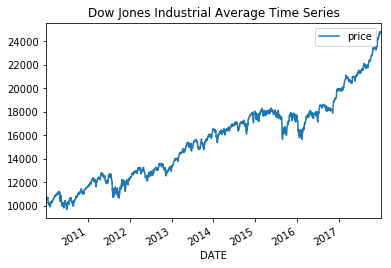

In [4]:
djia_data.index = pd.to_datetime(djia_data.DATE)
djia_data.plot()
plt.title('Dow Jones Industrial Average Time Series')
plt.show()

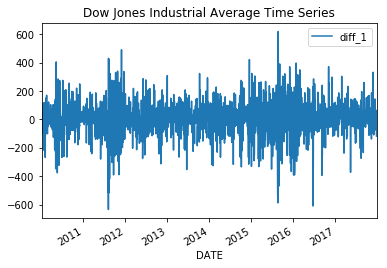

In [5]:
djia_data['diff_1'] = djia_data.price - djia_data.price.shift()
djia_data.plot(y = 'diff_1')
plt.title('Dow Jones Industrial Average Time Series')
plt.show()

C:\Users\Mike\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


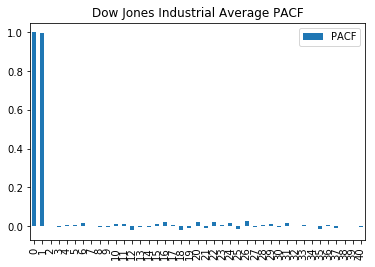

In [6]:
from statsmodels.tsa.stattools import pacf

x_acf = pd.DataFrame(pacf(djia_data.price))
x_acf.plot(kind = 'bar')
plt.title("Dow Jones Industrial Average PACF")
plt.legend(['PACF'])
plt.show()

    there are two strong autocorrelations

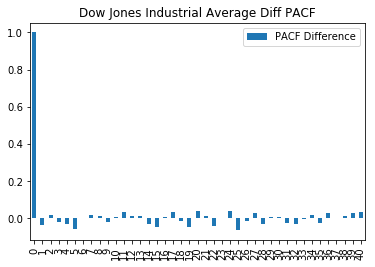

In [7]:
x_acf_diff = pd.DataFrame(pacf(djia_data.diff_1[1:]))   # because index 0 is NaN
x_acf_diff.plot(kind = 'bar')
plt.title("Dow Jones Industrial Average Diff PACF")
plt.legend(['PACF Difference'])
plt.show()

    there is only one strong autocorrelation

#### Build Model

    want to compare these five specification of ARIMA models
    (1,0,0) (1,1,0) (1,1,1) (0,1,1) (0,0,1)

In [8]:
from statsmodels.tsa.arima_model import ARIMA

# Specification (1,0,0)
model_100 = ARIMA(djia_data.price, order = (1,0,0))
model_100_fit = model_100.fit()

print(model_100_fit.summary())

print('Residuals Description')
print(model_100_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2013
Model:                     ARMA(1, 0)   Log Likelihood              -12551.021
Method:                       css-mle   S.D. of innovations            123.232
Date:                Wed, 11 Apr 2018   AIC                          25108.041
Time:                        09:12:35   BIC                          25124.863
Sample:                    01-04-2010   HQIC                         25114.216
                         - 12-29-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.558e+04   6589.748      2.364      0.018    2664.237    2.85e+04
ar.L1.price     0.9998      0.000   3884.851      0.000       0.999       1.000
                                    Roots       

In [9]:
# Specification (1,1,0)
model_110 = ARIMA(djia_data.price, order = (1,1,0))
model_110_fit = model_110.fit()

print(model_110_fit.summary())

print('Residuals Description')
print(model_110_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2012
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -12536.045
Method:                       css-mle   S.D. of innovations            122.940
Date:                Wed, 11 Apr 2018   AIC                          25078.090
Time:                        09:12:35   BIC                          25094.911
Sample:                    01-05-2010   HQIC                         25084.265
                         - 12-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0284      2.639      2.664      0.008       1.857      12.200
ar.L1.D.price    -0.0388      0.022     -1.741      0.082      -0.082       0.005
                                    Root

In [10]:
# Specification (1,1,1)
model_111 = ARIMA(djia_data.price, order = (1,1,1))
model_111_fit = model_111.fit()

print(model_111_fit.summary())

print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2012
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12535.325
Method:                       css-mle   S.D. of innovations            122.896
Date:                Wed, 11 Apr 2018   AIC                          25078.651
Time:                        09:12:36   BIC                          25101.078
Sample:                    01-05-2010   HQIC                         25086.883
                         - 12-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0266      2.685      2.617      0.009       1.763      12.290
ar.L1.D.price    -0.6983      0.294     -2.374      0.018      -1.275      -0.122
ma.L1.D.price     0.6646      0.307     

In [11]:
# Specification (0,1,1)
model_011 = ARIMA(djia_data.price, order = (0,1,1))
model_011_fit = model_011.fit()

print(model_011_fit.summary())

print('Residuals Description')
print(model_011_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2012
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12536.101
Method:                       css-mle   S.D. of innovations            122.944
Date:                Wed, 11 Apr 2018   AIC                          25078.201
Time:                        09:12:36   BIC                          25095.022
Sample:                    01-05-2010   HQIC                         25084.375
                         - 12-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0273      2.638      2.663      0.008       1.856      12.198
ma.L1.D.price    -0.0374      0.022     -1.709      0.088      -0.080       0.005
                                    Root

In [12]:
# Specification (0, 0, 1)
model_001 = ARIMA(djia_data.price, order = (0,0,1))
model_001_fit = model_011.fit()

print(model_001_fit.summary())

print('Residuals Description')
print(model_001_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2012
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12536.101
Method:                       css-mle   S.D. of innovations            122.944
Date:                Wed, 11 Apr 2018   AIC                          25078.201
Time:                        09:12:36   BIC                          25095.022
Sample:                    01-05-2010   HQIC                         25084.375
                         - 12-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0273      2.638      2.663      0.008       1.856      12.198
ma.L1.D.price    -0.0374      0.022     -1.709      0.088      -0.080       0.005
                                    Root

#### Results

In [13]:
result = {'100': model_100_fit.resid.describe(),
          '110': model_110_fit.resid.describe(),
          '111': model_111_fit.resid.describe(),
          '011': model_011_fit.resid.describe(),
          '001': model_001_fit.resid.describe()}

In [14]:
pd.DataFrame(result)

,001,011,100,110,111
count,2012.000000,2012.000000,2013.000000,2012.000000,2012.000000
mean,0.000528,0.000528,4.539350,-0.000655,0.000444
std,122.974371,122.974371,166.054196,122.970983,122.926921
min,-640.497576,-640.497576,-4995.944577,-639.697478,-624.916056
25%,-56.616022,-56.616022,-49.697573,-56.419147,-57.064007
50%,2.226444,2.226444,8.087996,2.244751,2.098971
75%,63.699807,63.699807,71.842881,63.802522,64.642532
max,603.252473,603.252473,619.085190,603.820024,612.761141


    want to compare these five specification of ARIMA models
    (1,1,0) (1,1,1) (1,0,0) (0,1,1) (0,0,1)

In [15]:
start_index = '2018-12-25'
end_index = '2018-12-25'
forecast = model_111_fit.predict(start=start_index, end=end_index)

ValueError: There is no frequency for these dates and date 2018-12-25 00:00:00 is not in dates index. Try giving a date that is in the dates index or use an integer

Error is saying not in the index, but if the data is in the index then it already happened. Forecast?